# Which Language Has More Information?

> 电子信息与通信学院 提高2301班 张禹阳

## Data Preprocessing

It is significant to respectively preprocess the 2 `.docx` files due to the divergence between Chinese and English. Specifically:

* Chinese text:
  * use UTF-8 code to process the text, the Unicode range for Chinese characters is usually `\u4e00-\u9fff` (covering most Simplified and Traditional Chinese).
  * remove all non-Hanzi characters, including:
    * punctuation marks
    * numbers
    * spaces, tabs, line breakers
    * special symbols
    * English letters, etc.
  * remove all text styles(e.g. bolding titles), leaving plain text
* English text:
  * convert all letters to lower/upper case
  * remove all non-letter and non-space characters, including:
    * punctuation marks
    * numbers
    * special symbols
  * normalize spaces
    * replace all consecutive whitespace (including multiple spaces, tabs, line breaks, etc.) with a single space
    * reason:  multiple consecutive spaces usually carry no additional information in English and may be caused by formatting; after normalization, spaces are treated as a single symbol to avoid redundancy in the sequence.

In [2]:
import re

with open('Ren_Zheng_Fei_Email.txt', 'r', encoding='utf-8') as f:
    chinese_content = f.read()
    
def clean_chinese(content):
    cleaned_content = re.sub(r'[^\u4e00-\u9fff]', '', content, flags=re.UNICODE)
    return cleaned_content

cleaned_chinese_content = clean_chinese(chinese_content)
# print(cleaned_chinese_content)

In [3]:
import re

with open('Elon_Mask_Speech.txt', 'r', encoding='utf-8') as f:
    english_content = f.read()
    
def clean_english(content):
    content = content.lower()
    content = re.sub(r'[^a-z ]', '', content, flags=re.UNICODE)
    cleaned_content = re.sub(r'\s+', ' ', content, flags=re.UNICODE)
    return cleaned_content

cleaned_english_content = clean_english(english_content)
# print(cleaned_english_content)

## 0-order Markov Source

In [ ]:
import re
import math
from collections import Counter

with open('Ren_Zheng_Fei_Email.txt', 'r', encoding='utf-8') as f1:
    chinese_content = f1.read()
    
def clean_chinese(content):
    cleaned_content = re.sub(r'[^\u4e00-\u9fff]', '', content, flags=re.UNICODE)
    return cleaned_content

cleaned_chinese_content = clean_chinese(chinese_content)

with open('Elon_Mask_Speech.txt', 'r', encoding='utf-8') as f2:
    english_content = f2.read()
    
def clean_english(content):
    content = content.lower()
    content = re.sub(r'[^a-z ]', '', content, flags=re.UNICODE)
    cleaned_content = re.sub(r'\s+', ' ', content, flags=re.UNICODE)
    return cleaned_content

cleaned_english_content = clean_english(english_content)

chars_zh = [c for c in cleaned_chinese_content]
char_counts_zh = Counter(chars_zh)
total_chars_zh = sum(char_counts_zh.values())

chars_en = [c for c in cleaned_english_content]
char_counts_en = Counter(chars_en)
total_chars_en = sum(char_counts_en.values())

probs_zh = [count / total_chars_zh for count in char_counts_zh.values()]
probs_en = [count / total_chars_en for count in char_counts_en.values()]

entropy_zh = -sum(p * math.log2(p) for p in probs_zh if p > 0)
entropy_en = -sum(p * math.log2(p) for p in probs_en if p > 0)

print(f"Chinese 0-order entropy: {entropy_zh:.4f} bits/symbol")
print(f"English 0-order entropy: {entropy_en:.4f} bits/symbol")

## 1-order Markov Source

In [ ]:
from collections import Counter, defaultdict
import math

chars_zh = [c for c in cleaned_chinese_content]
char_set_zh = set(chars_zh)
transitions_zh = defaultdict(Counter)
for i in range(len(chars_zh) - 1):
    transitions_zh[chars_zh[i]][chars_zh[i+1]] += 1
char_counts_zh = Counter(chars_zh)
total_chars_zh = sum(char_counts_zh.values())
trans_probs_zh = {}
for c1 in char_set_zh:
    total = sum(transitions_zh[c1].values())
    if total > 0:
        trans_probs_zh[c1] = {c2: count/total for c2, count in transitions_zh[c1].items()}
    else:
        trans_probs_zh[c1] = {}
pi_zh = {c: char_counts_zh[c]/total_chars_zh for c in char_set_zh}
entropy_zh = 0
for c1 in char_set_zh:
    h_c1 = 0
    for c2, p in trans_probs_zh[c1].items():
        if p > 0:
            h_c1 -= p * math.log2(p)
    entropy_zh += pi_zh[c1] * h_c1
print(f"Chinese 1-order entropy: {entropy_zh:.4f} bits/symbol")

chars_en = [c for c in cleaned_english_content]
char_set_en = set(chars_en)
transitions_en = defaultdict(Counter)
for i in range(len(chars_en) - 1):
    transitions_en[chars_en[i]][chars_en[i+1]] += 1
char_counts_en = Counter(chars_en)
total_chars_en = sum(char_counts_en.values())
trans_probs_en = {}
for c1 in char_set_en:
    total = sum(transitions_en[c1].values())
    if total > 0:
        trans_probs_en[c1] = {c2: count/total for c2, count in transitions_en[c1].items()}
    else:
        trans_probs_en[c1] = {}
pi_en = {c: char_counts_en[c]/total_chars_en for c in char_set_en}
entropy_en = 0
for c1 in char_set_en:
    h_c1 = 0
    for c2, p in trans_probs_en[c1].items():
        if p > 0:
            h_c1 -= p * math.log2(p)
    entropy_en += pi_en[c1] * h_c1
print(f"English 1-order entropy: {entropy_en:.4f} bits/symbol")

## N(0~7)-order Markov Source

Chinese 0-order entropy: 8.2624 bits/symbol
Chinese 1-order entropy: 2.1911 bits/symbol
Chinese 2-order entropy: 0.5529 bits/symbol
Chinese 3-order entropy: 0.1169 bits/symbol
Chinese 4-order entropy: 0.0482 bits/symbol
Chinese 5-order entropy: 0.0132 bits/symbol
Chinese 6-order entropy: 0.0096 bits/symbol
Chinese 7-order entropy: 0.0079 bits/symbol
English 0-order entropy: 4.0859 bits/symbol
English 1-order entropy: 3.2442 bits/symbol
English 2-order entropy: 2.1938 bits/symbol
English 3-order entropy: 1.2741 bits/symbol
English 4-order entropy: 0.7451 bits/symbol
English 5-order entropy: 0.4749 bits/symbol
English 6-order entropy: 0.2959 bits/symbol
English 7-order entropy: 0.1826 bits/symbol


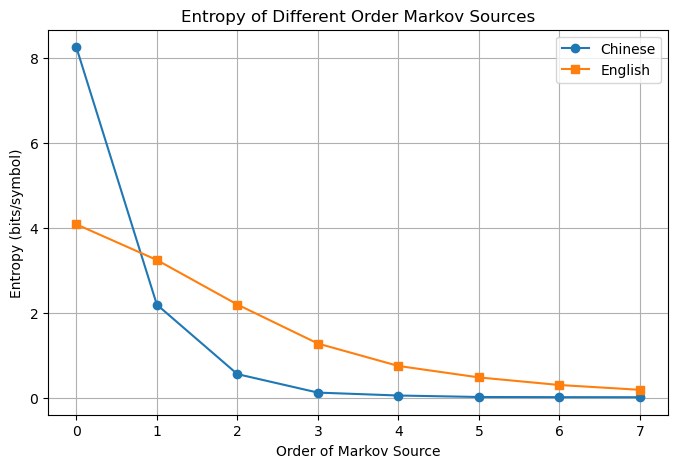

In [4]:
import math
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

def calc_entropy_norder(chars, order):
    if order == 0:
        char_counts = Counter(chars)
        total_chars = sum(char_counts.values())
        probs = [count / total_chars for count in char_counts.values()]
        entropy = -sum(p * math.log2(p) for p in probs if p > 0)
        return entropy
    else:
        ngram_counts = Counter()
        nplus_counts = Counter()
        for i in range(len(chars) - order):
            ngram = tuple(chars[i:i+order]) # context(n characters)
            nplus = tuple(chars[i:i+order+1]) # context + next character
            ngram_counts[ngram] += 1
            nplus_counts[nplus] += 1
        total_ngrams = sum(ngram_counts.values()) # get the number of different context
        pi = {ngram: count / total_ngrams for ngram, count in ngram_counts.items()} # stable probs
        entropy = 0
        for nplus, count in nplus_counts.items():
            ngram = nplus[:-1] # get context
            p_cond = nplus_counts[nplus] / ngram_counts[ngram] # conditional probs
            if p_cond > 0:
                entropy -= pi[ngram] * p_cond * math.log2(p_cond)
        return entropy

chars_zh = [c for c in cleaned_chinese_content]
entropies_zh = []
for order in range(8):
    entropies_zh.append(calc_entropy_norder(chars_zh, order))

chars_en = [c for c in cleaned_english_content]
entropies_en = []
for order in range(8):
    entropies_en.append(calc_entropy_norder(chars_en, order))

for i in range(8):
    print(f"Chinese {i}-order entropy: {entropies_zh[i]:.4f} bits/symbol")
for i in range(8):
    print(f"English {i}-order entropy: {entropies_en[i]:.4f} bits/symbol")

plt.figure(figsize=(8,5))
plt.plot(range(8), entropies_zh, marker='o', label='Chinese')
plt.plot(range(8), entropies_en, marker='s', label='English')
plt.xlabel('Order of Markov Source')
plt.ylabel('Entropy (bits/symbol)')
plt.title('Entropy of Different Order Markov Sources')
plt.xticks(range(8))
plt.legend()
plt.grid(True)
plt.show()

## Result Analysis

### Influence of Character Set Size

* At zero-order, the entropy of Chinese is usually larger than that of English because the distribution of Chinese characters is more even (as opposed to the distribution of letters in English, which has a large difference in the frequency of English letters, e.g., ‘e’ occurs very frequently). There are only 27 letters in the English language and thousands of Chinese characters, the probability of each character appearing is on average much smaller
* However, when considering higher-order models, contextual information greatly reduces the uncertainty of the next symbol. Since there is a strong regularity in the combination of Chinese characters (e.g., certain characters are almost always followed by specific ones), the conditional probability distribution is more centralized (some transfer probabilities are close to 1), and thus the conditional entropy decreases rapidly

### Linguistic Structural Differences

* Chinese: each Chinese character itself may carry more semantics, and words usually consist of 2-4 characters. Therefore, in the 2nd or 3rd order model, many words can already be covered (e.g., the 2nd order can cover the combination of two characters, i.e., double-character words), so the conditional entropy of the next character will be small. For example, in set phrases, after seeing “声东击”， it is almost certain that the next character is “西”
* English: English words consist of letters, but the word length varies. In a 2nd or 3rd order model, only a part of the word may be covered (e.g., only the first two letters can be considered in 2nd order), so the prediction of the next letter is not as strong as in Chinese. For example, after seeing "th", the next letter may be "e" (to form "the"), "a"(to form "that"), etc. In addition, the space is used as a separator in English, and the prediction of the first letter after the space may be more difficult

### Explanation of the Curves

|order|Chinese|English|
|-|-|-|
|0|highest entropy(large number of Chinese characters, relatively uniform distribution)|lower entropy (large differences in letter frequencies, e.g., e ≈ 12%)|
|1|significant decline(captures patterns of double-worded phrases)|moderate decline|
|2~3|sharp decline(covers triple-worded/phrase-meaning units)|slow decline|
|4 and higher|approaching asymptotic values|continued gentle decline|

## Conclusion

Through the analysis of Chinese and English texts using Markov sources of different orders, I observed significant differences in the entropy values between the two languages:

* at zero-order, Chinese exhibits higher entropy due to its larger and more uniformly distributed character set, while English, with fewer letters and more skewed frequency distribution, shows lower entropy
* as the order of the Markov model increases, the entropy of both languages decreases, reflecting the increasing predictability of the next character given more context
* however, the decline in entropy is much sharper for Chinese, indicating stronger contextual constraints and higher redundancy in character sequences
* this demonstrates that, although Chinese characters individually carry more information, the structure of the language allows for greater predictability when context is considered
* in contrast, English maintains a relatively higher entropy at higher orders, suggesting more variability in letter sequences.
* overall, this comparative study highlights the impact of linguistic structure and character set size on the information content and redundancy of natural languages